#### Analysis of multiple stocks - for simulation over the course of 2 years (bi-weekly buy in)

Goal: This script simulates 2 years of bi-weekly prediction/closing_cost determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied bi-weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [3]:
# choose stocks of interest
# stocks chosen must all have data for full range of dates
lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

# choose how much to contribute each bi-weekly period
biwkly_contrib = 10 

# max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
invest = biwkly_contrib*50

In [4]:
# Pull the closing data

data = yf.download(
        tickers = lista
        ,period = '3y'
        #,start = '2015-03-31' # to choose custom date ranges
        #,end = '2019-01-01' # to choose custom date ranges
    )

df = data['Close']
df = df.dropna() # in case the first row generates as nulls
df['Index'] = np.arange(1,len(df)+1) # add an index
df

[*********************100%***********************]  14 of 14 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,,
2018-09-24,55.197498,32.610001,1934.359985,158.779999,1173.369995,46.910000,82.250000,114.669998,66.425003,183.889999,56.689999,86.040001,59.936001,44.889999,1
2018-09-25,55.547501,32.570000,1974.550049,158.869995,1184.650024,45.910000,84.010002,114.449997,67.102501,184.139999,56.900002,95.349998,60.198002,44.169998,2
2018-09-26,55.105000,32.189999,1974.849976,158.330002,1180.489990,45.700001,83.349998,113.980003,66.730003,184.270004,57.270000,94.650002,61.916000,44.270000,3
2018-09-27,56.237499,32.590000,2012.979980,160.429993,1194.640015,45.880001,80.370003,114.410004,66.849998,185.830002,57.340000,97.959999,61.504002,44.759998,4
2018-09-28,56.435001,30.889999,2003.000000,159.029999,1193.469971,47.290001,81.550003,114.370003,70.254997,185.789993,56.840000,99.010002,52.953999,44.160000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,148.789993,106.220001,3488.239990,260.359985,2887.469971,54.830002,509.649994,305.220001,222.419998,378.309998,114.669998,255.089996,756.989990,120.790001,751
2021-09-17,146.059998,103.879997,3462.520020,260.529999,2829.270020,54.259998,506.989990,299.869995,219.000000,373.829987,113.410004,255.789993,759.489990,117.750000,752
2021-09-20,142.940002,101.550003,3355.729980,258.220001,2780.340088,52.980000,489.269989,294.299988,211.130005,365.700012,111.820000,250.229996,730.169983,114.699997,753


In [5]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}

for j in lista:
    x = (max(df['Index']))-260
    y = max(df['Index'])

    for i in range(50):
        dataframes['data' + str(i)] = df.iloc[x:y]
        x -= 10
        y -= 10

print(dataframes['data0'])
print(dataframes['data49'])

                  AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2020-09-11  112.000000   76.339996  3116.219971  243.100006  1520.719971   
2020-09-14  115.360001   77.900002  3102.969971  246.639999  1519.280029   
2020-09-15  115.540001   78.930000  3156.129883  251.679993  1541.439941   
2020-09-16  112.129997   76.660004  3078.100098  250.600006  1520.900024   
2020-09-17  110.339996   76.550003  3008.729980  244.529999  1495.530029   
...                ...         ...          ...         ...          ...   
2021-09-16  148.789993  106.220001  3488.239990  260.359985  2887.469971   
2021-09-17  146.059998  103.879997  3462.520020  260.529999  2829.270020   
2021-09-20  142.940002  101.550003  3355.729980  258.220001  2780.340088   
2021-09-21  143.429993  102.820000  3343.629883  257.970001  2792.929932   
2021-09-22  145.850006  104.379997  3380.050049  259.170013  2818.770020   

           

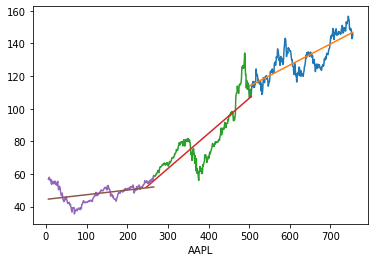

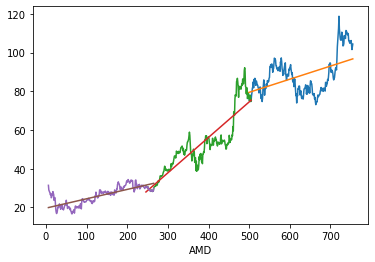

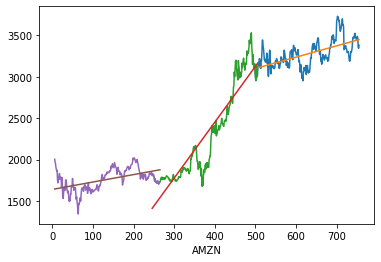

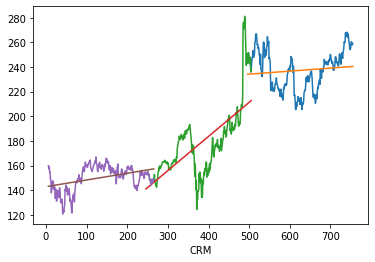

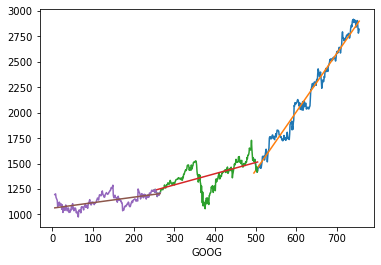

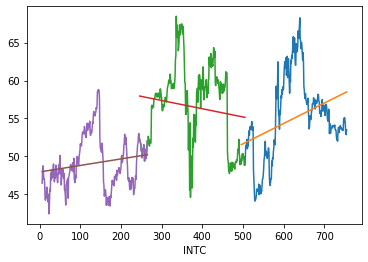

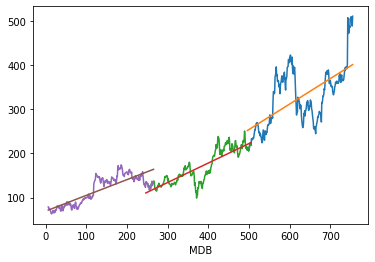

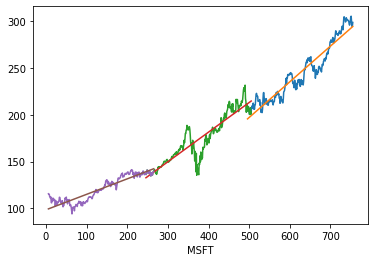

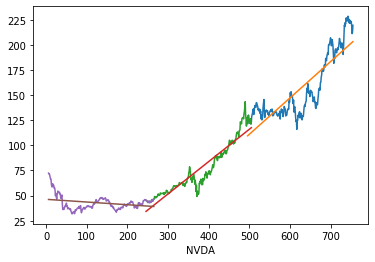

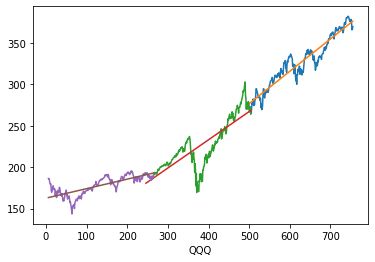

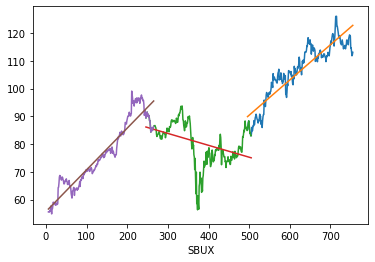

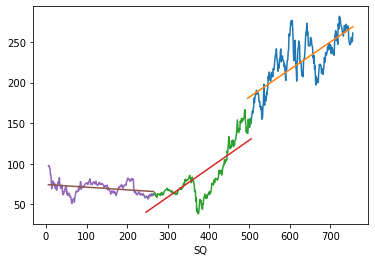

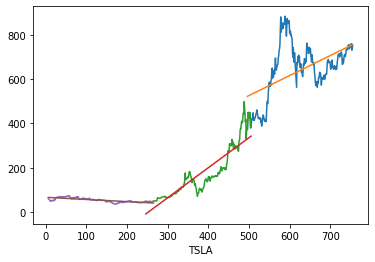

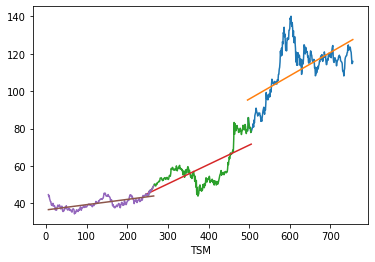

In [6]:
# plot 3 1-year segments of data with their associated trendlines

for i in lista:
    # plot data with a trendline - most recent 260 days
    x = dataframes['data0']['Index']
    y = dataframes['data0'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the middle 260 days
    x = dataframes['data25']['Index']
    y = dataframes['data25'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the oldest 260 days
    x = dataframes['data49']['Index']
    y = dataframes['data49'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    plt.xlabel(i)
    plt.show()

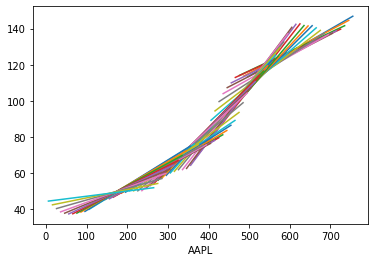

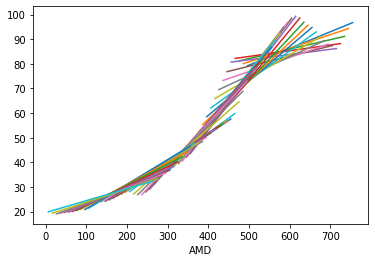

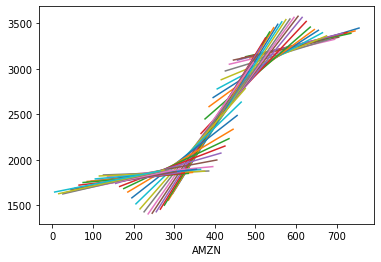

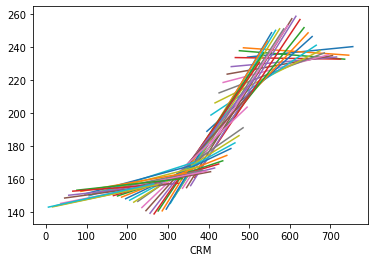

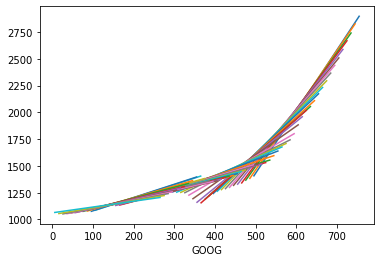

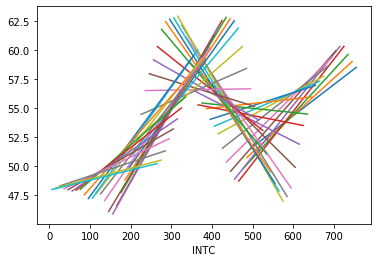

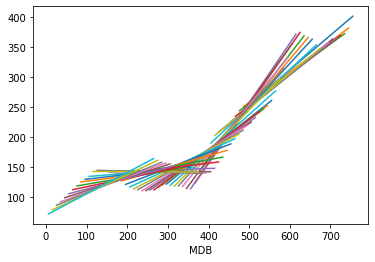

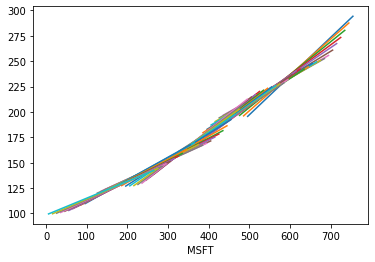

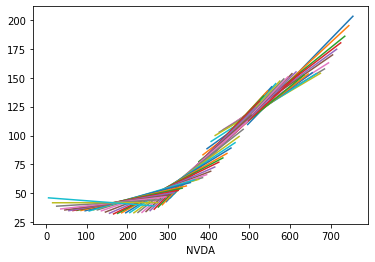

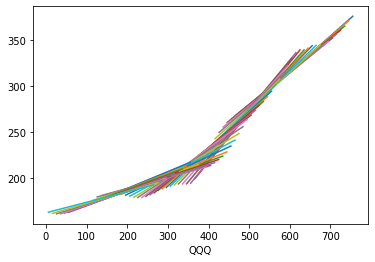

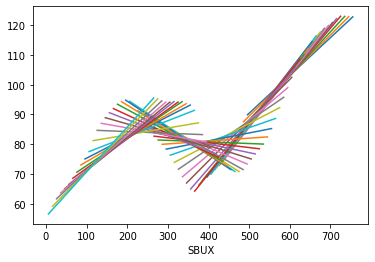

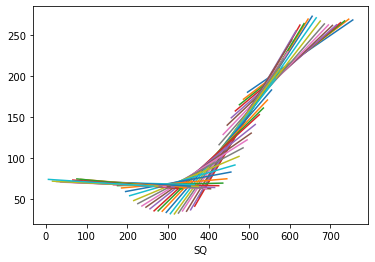

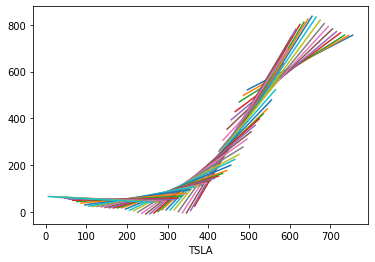

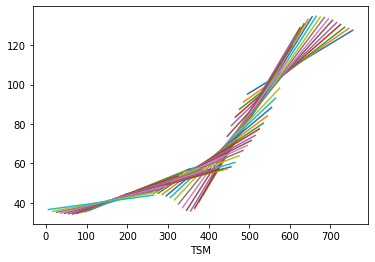

In [7]:
# plot only trendlines, bi-weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for j in lista:
    for i in range(len(dataframes)):
        x = dataframes['data' + str(i)]['Index']
        y = dataframes['data' + str(i)][str(j)]

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)

    plt.xlabel(j)
    plt.show()

In [8]:
# create pred and pred/close list for each of the 50 dataframes
# may take 30+ seconds to run

k = len(dataframes)

for j in lista:
    for e in range(k):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][str(j)]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            x = range(260)
            m, b = np.polyfit(x, y, 1)
            d = m*i+b
            nlist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/close
            d = (dataframes['data' + str(e)][str(j) + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][str(j)].iloc[i-1])
            ylist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist

dataframes['data0']

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-11,112.000000,76.339996,3116.219971,243.100006,1520.719971,49.279999,207.380005,204.029999,121.644997,270.450012,...,275.482843,1.018609,90.036719,1.055902,180.953963,1.316508,523.200397,1.403736,95.367916,1.209946
2020-09-14,115.360001,77.900002,3102.969971,246.639999,1519.280029,49.410000,211.029999,205.410004,128.722504,275.160004,...,275.873045,1.002591,90.163623,1.040790,181.294681,1.255503,524.101643,1.248991,95.492756,1.186245
2020-09-15,115.540001,78.930000,3156.129883,251.679993,1541.439941,50.000000,213.600006,208.779999,129.910004,279.059998,...,276.263247,0.989978,90.290528,1.029421,181.635399,1.175634,525.002890,1.167296,95.617597,1.113775
2020-09-16,112.129997,76.660004,3078.100098,250.600006,1520.900024,50.369999,205.690002,205.050003,125.144997,274.609985,...,276.653449,1.007441,90.417433,1.023053,181.976117,1.204741,525.904137,1.190475,95.742437,1.151719
2020-09-17,110.339996,76.550003,3008.729980,244.529999,1495.530029,50.320000,208.649994,202.910004,124.635002,270.320007,...,277.043650,1.024873,90.544337,1.043739,182.316835,1.251832,526.805383,1.244138,95.867278,1.170398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,148.789993,106.220001,3488.239990,260.359985,2887.469971,54.830002,509.649994,305.220001,222.419998,378.309998,...,374.984294,0.991209,122.397395,1.067388,267.837061,1.049971,753.018262,0.994753,127.202249,1.053086
2021-09-17,146.059998,103.879997,3462.520020,260.529999,2829.270020,54.259998,506.989990,299.869995,219.000000,373.829987,...,375.374496,1.004132,122.524299,1.080366,268.177779,1.048430,753.919509,0.992665,127.327090,1.081334
2021-09-20,142.940002,101.550003,3355.729980,258.220001,2780.340088,52.980000,489.269989,294.299988,211.130005,365.700012,...,375.764698,1.027522,122.651204,1.096863,268.518497,1.073087,754.820755,1.033760,127.451930,1.111176


In [9]:
# pull the last 'close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1-year period and the final pred/close derived from a 1-year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in lista:
    nlist = []
    ylist = []
    k = len(dataframes['data0'])

    for e in reversed(range(len(dataframes))):
        nlist.append(round(dataframes['data' + str(e)][str(j) + ' pred/close'].iloc[k-1],4))
        ylist.append(round(dataframes['data' + str(e)][str(j)].iloc[k-1],4))

    df[str(j)] = pd.DataFrame(ylist)
    df[str(j) + ' pred/close'] = pd.DataFrame(nlist)

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,QQQ,QQQ pred/close,SBUX,SBUX pred/close,SQ,SQ pred/close,TSLA,TSLA pred/close,TSM,TSM pred/close
40,41,127.45,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,326.39,1.0570,111.20,1.0481,207.85,1.3095,589.74,1.4164,112.46,1.2003
41,42,124.61,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,333.93,1.0342,113.88,1.0350,222.52,1.2051,625.22,1.3151,117.36,1.1469
42,43,130.48,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,344.51,1.0061,112.45,1.0593,230.95,1.1456,617.69,1.3063,120.99,1.1099
43,44,134.78,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,353.71,0.9868,112.24,1.0698,246.60,1.0678,688.72,1.1538,119.61,1.1167
44,45,145.64,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,362.42,0.9735,119.55,1.0122,241.43,1.0881,668.54,1.1722,123.90,1.0722
45,46,146.77,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,364.43,0.9802,126.03,0.9707,251.73,1.0463,644.78,1.1978,113.54,1.1590
46,47,145.60,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,366.84,0.9856,116.39,1.0580,273.08,0.9741,709.99,1.0802,116.36,1.1230
47,48,149.62,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,374.37,0.9771,115.08,1.0695,270.17,0.9924,708.49,1.0681,112.11,1.1529
48,49,155.11,0.9326,106.17,0.8892,3525.5000,0.9697,262.62,0.8958,2897.6699,...,380.78,0.9761,118.04,1.0416,254.72,1.0607,753.87,1.0019,121.89,1.0556
49,50,145.85,1.0075,104.38,0.9275,3380.0500,1.0210,259.17,0.9279,2818.7700,...,369.57,1.0189,113.07,1.0870,261.07,1.0311,751.94,1.0062,115.87,1.1021


#### At this point, the foundation is set and strategies can be created and tested.

In [10]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

for j in lista:
    nlist = []
    for i in range(len(df)):
        if df[str(j) + ' pred/close'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[str(j) + ' >1'] = nlist

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,GOOG >1,INTC >1,MDB >1,MSFT >1,NVDA >1,QQQ >1,SBUX >1,SQ >1,TSLA >1,TSM >1
40,41,127.45,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,0,1,1,1,1,1,1,1,1,1
41,42,124.61,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,0,1,1,1,0,1,1,1,1,1
42,43,130.48,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,0,1,1,0,0,1,1,1,1,1
43,44,134.78,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,0,1,0,0,0,0,1,1,1,1
44,45,145.64,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,0,1,1,0,0,0,1,1,1,1
45,46,146.77,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,0,1,1,0,0,0,0,1,1,1
46,47,145.60,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,0,1,1,0,0,0,1,0,1,1
47,48,149.62,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,0,1,0,0,0,0,1,0,1,1
48,49,155.11,0.9326,106.17,0.8892,3525.5000,0.9697,262.62,0.8958,2897.6699,...,0,1,0,0,0,0,1,1,1,1
49,50,145.85,1.0075,104.38,0.9275,3380.0500,1.0210,259.17,0.9279,2818.7700,...,1,1,0,0,0,1,1,1,1,1


In [11]:
# square the pred/close number as a more extreme option for calculations

for j in lista:
    df[str(j) +' pred/close2'] = round(df[str(j) +' pred/close']**2,4) # make the value differences a little more pronounced

df.tail(10)

,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,GOOG pred/close2,INTC pred/close2,MDB pred/close2,MSFT pred/close2,NVDA pred/close2,QQQ pred/close2,SBUX pred/close2,SQ pred/close2,TSLA pred/close2,TSM pred/close2
40,41,127.45,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,0.9328,1.0727,1.8371,1.0110,1.1660,1.1172,1.0985,1.7148,2.0062,1.4407
41,42,124.61,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,0.9090,1.0227,1.4252,1.0110,0.8995,1.0696,1.0712,1.4523,1.7295,1.3154
42,43,130.48,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,0.8806,1.0153,1.0173,0.9460,0.7670,1.0122,1.1221,1.3124,1.7064,1.2319
43,44,134.78,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,0.9287,1.0679,0.8471,0.9067,0.6659,0.9738,1.1445,1.1402,1.3313,1.2470
44,45,145.64,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,0.9206,1.1122,1.0716,0.8636,0.7048,0.9477,1.0245,1.1840,1.3741,1.1496
45,46,146.77,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,0.8985,1.2878,1.0337,0.8724,0.8292,0.9608,0.9423,1.0947,1.4347,1.3433
46,47,145.60,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,0.9376,1.2519,1.0308,0.9128,0.8192,0.9714,1.1194,0.9489,1.1668,1.2611
47,48,149.62,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,0.9305,1.2288,0.9419,0.8603,0.7298,0.9547,1.1438,0.9849,1.1408,1.3292
48,49,155.11,0.9326,106.17,0.8892,3525.5000,0.9697,262.62,0.8958,2897.6699,...,0.9557,1.2144,0.6566,0.9201,0.7649,0.9528,1.0849,1.1251,1.0038,1.1143
49,50,145.85,1.0075,104.38,0.9275,3380.0500,1.0210,259.17,0.9279,2818.7700,...,1.0613,1.1966,0.6191,0.9738,0.8604,1.0382,1.1816,1.0632,1.0124,1.2146


In [12]:
# Create all of the strategies to test 

for j in lista:
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    df[str(j) +' baseline'] = 0
    df[str(j) +' baseline_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' baseline'].iloc[i] = biwkly_contrib
        df[str(j) +' baseline_stk'].iloc[i] = round(df[str(j) +' baseline'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib
        if v < biwkly_contrib:
            break

# opt1 - buy in every other week but proportionally to the pred/close
    df[str(j) +' opt1'] = 0
    df[str(j) +' opt1_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt1'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        df[str(j) +' opt1_stk'].iloc[i] = round(df[str(j) +' opt1'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close'].iloc[t]:
            break

# opt2 - buy in every other week but proportionally to the square of pred/close
    df[str(j) +' opt2'] = 0
    df[str(j) +' opt2_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt2'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        df[str(j) +' opt2_stk'].iloc[i] = round(df[str(j) +' opt2'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close2'].iloc[t]:
            break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    df[str(j) +' opt3'] = 0
    df[str(j) +' opt3_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt3'].iloc[i] = biwkly_contrib*2*df[str(j) +' >1'].iloc[i] 
        df[str(j) +' opt3_stk'].iloc[i] = round(df[str(j) +' opt3'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*2*df[str(j) +' >1'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*2*df[str(j) +' >1'].iloc[t]:
            break

# opt4 - buy in every other week but proportionally to the inverse of pred/close
# This is more of a validation and will ideally return negative compared to baseline
    df[str(j) +' opt4'] = 0
    df[str(j) +' opt4_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt4'].iloc[i] = round(biwkly_contrib/df[str(j) +' pred/close'].iloc[i],4)
        df[str(j) +' opt4_stk'].iloc[i] = round(df[str(j) +' opt4'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib/df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib/df[str(j) +' pred/close'].iloc[t]:
            break

df.tail(10)

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Index,AAPL,AAPL pred/close,AMD,AMD pred/close,AMZN,AMZN pred/close,CRM,CRM pred/close,GOOG,...,TSM baseline,TSM baseline_stk,TSM opt1,TSM opt1_stk,TSM opt2,TSM opt2_stk,TSM opt3,TSM opt3_stk,TSM opt4,TSM opt4_stk
40,41,127.45,1.1032,74.59,1.2480,3222.8999,1.0551,217.66,1.1094,2316.1599,...,10,0.0889,12.003,0.1067,14.407,0.1281,20,0.1778,8.3313,0.0741
41,42,124.61,1.1168,80.08,1.1374,3223.0701,1.0440,238.10,1.0002,2411.5601,...,10,0.0852,11.469,0.0977,13.154,0.1121,20,0.1704,8.7192,0.0743
42,43,130.48,1.0542,81.55,1.0973,3383.8701,0.9845,246.26,0.9614,2527.0400,...,10,0.0827,11.099,0.0917,12.319,0.1018,20,0.1653,9.0098,0.0745
43,44,134.78,1.0152,87.08,1.0113,3443.8899,0.9660,244.57,0.9632,2536.3899,...,10,0.0836,11.167,0.0934,12.470,0.1043,20,0.1672,8.9550,0.0749
44,45,145.64,0.9441,90.26,0.9691,3677.3601,0.9109,244.02,0.9633,2619.8899,...,10,0.0807,10.722,0.0865,11.496,0.0928,20,0.1614,9.3266,0.0753
45,46,146.77,0.9463,91.03,0.9473,3626.3899,0.9362,243.51,0.9617,2735.9299,...,10,0.0881,11.590,0.1021,13.433,0.1183,20,0.1761,8.6281,0.0760
46,47,145.60,0.9601,106.48,0.8289,3320.6799,1.0245,243.39,0.9569,2761.9299,...,10,0.0859,11.230,0.0965,12.611,0.1084,20,0.1719,8.9047,0.0765
47,48,149.62,0.9471,107.65,0.8472,3305.7800,1.0263,259.66,0.8967,2847.9700,...,10,0.0892,11.529,0.1028,13.292,0.1186,20,0.1784,8.6738,0.0774
48,49,155.11,0.9326,106.17,0.8892,3525.5000,0.9697,262.62,0.8958,2897.6699,...,10,0.0820,10.556,0.0866,11.143,0.0914,20,0.1641,0.0000,0.0000
49,50,145.85,1.0075,104.38,0.9275,3380.0500,1.0210,259.17,0.9279,2818.7700,...,10,0.0863,11.021,0.0951,0.000,0.0000,20,0.1726,0.0000,0.0000


In [13]:
print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()

for j in lista:
    d = {'name': [str(j) +' baseline', str(j) +' op1', str(j) +' op2', str(j) +' op3', str(j) +' op4']
         ,'bought_in': [
             round(sum(df[str(j) +' baseline']),2),
             round(sum(df[str(j) +' opt1']),2), 
             round(sum(df[str(j) +' opt2']),2), 
             round(sum(df[str(j) +' opt3']),2),
             round(sum(df[str(j) +' opt4']),2)]
         ,'stocks_held': [
             round(sum(df[str(j) +' baseline_stk']),4), 
             round(sum(df[str(j) +' opt1_stk']),4), 
             round(sum(df[str(j) +' opt2_stk']),4), 
             round(sum(df[str(j) +' opt3_stk']),4), 
             round(sum(df[str(j) +' opt4_stk']),4)]
#          ,'cost_per_stock': [
#              sum(df[str(j) +' baseline'])/sum(df[str(j) +' baseline_stk']), 
#              sum(df[str(j) +' opt1'])/sum(df[str(j) +' opt1_stk']), 
#              sum(df[str(j) +' opt2'])/sum(df[str(j) +' opt2_stk']), 
#              sum(df[str(j) +' opt3'])/sum(df[str(j) +' opt3_stk']), 
#             sum(df[str(j) +' opt4'])/sum(df[str(j) +' opt4_stk'])]
         ,'profit': [
             round((sum(df[str(j) +' baseline_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' baseline']),2),
             round((sum(df[str(j) +' opt1_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt1']),2), 
             round((sum(df[str(j) +' opt2_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt2']),2), 
             round((sum(df[str(j) +' opt3_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt3']),2), 
             round((sum(df[str(j) +' opt4_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt4']),2)]
        }

    df2 = pd.DataFrame(data=d)

    df2['diff'] = 0
    df2['diff'].iloc[1] = round(df2['profit'].iloc[1]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[2] = round(df2['profit'].iloc[2]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[3] = round(df2['profit'].iloc[3]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[4] = round(df2['profit'].iloc[4]-df2['profit'].iloc[0],2)

    df2['%_diff'] = round((df2['diff']/df2['profit'])*100,2)

    print('')
    print(df2)
    
    df_bought_in[str(j) + ' bought_in'] = df2['bought_in']
    df_profit[str(j) + ' profit'] = df2['profit']
    df_diff[str(j) + ' diff'] = df2['diff']

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

            name  bought_in  stocks_held  profit   diff  %_diff
0  AAPL baseline     500.00       5.1450  250.40   0.00    0.00
1       AAPL op1     497.10       5.1145  248.84  -1.56   -0.63
2       AAPL op2     499.73       5.1520  251.69   1.29    0.51
3       AAPL op3     400.00       3.8586  162.78 -87.62  -53.83
4       AAPL op4     498.27       5.1717  256.02   5.62    2.20

           name  bought_in  stocks_held  profit   diff  %_diff
0  AMD baseline     500.00       7.9079  325.43   0.00    0.00
1       AMD op1     498.83       7.8988  325.64   0.21    0.06
2       AMD op2     497.15       7.9275  330.32   4.89 

In [14]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4
df_bought_in

,AAPL bought_in,AMD bought_in,AMZN bought_in,CRM bought_in,GOOG bought_in,INTC bought_in,MDB bought_in,MSFT bought_in,NVDA bought_in,QQQ bought_in,SBUX bought_in,SQ bought_in,TSLA bought_in,TSM bought_in
0,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
1,497.10,498.83,498.84,497.72,486.38,493.64,493.43,495.87,474.86,495.82,497.05,489.02,458.04,497.78
2,499.73,497.15,491.64,492.98,475.93,491.94,493.13,493.33,457.13,493.66,489.39,496.63,446.05,491.76
3,400.00,420.00,500.00,400.00,160.00,500.00,460.00,420.00,280.00,260.00,500.00,420.00,340.00,500.00
4,498.27,498.44,495.98,497.74,496.69,492.97,498.93,495.52,499.13,496.25,498.75,499.77,495.02,492.25


In [15]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4
df_profit

,AAPL profit,AMD profit,AMZN profit,CRM profit,GOOG profit,INTC profit,MDB profit,MSFT profit,NVDA profit,QQQ profit,SBUX profit,SQ profit,TSLA profit,TSM profit
0,250.40,325.43,140.18,143.18,344.22,-18.20,678.39,237.31,626.69,196.09,121.53,650.35,1333.53,261.56
1,248.84,325.64,141.00,146.94,344.03,-14.49,706.92,238.51,583.82,196.57,129.42,673.40,1056.90,260.89
2,251.69,330.32,142.12,152.54,346.02,-10.77,749.81,240.99,551.60,198.29,142.39,747.99,896.02,264.58
3,162.78,301.48,146.60,140.01,172.05,0.34,747.35,241.59,264.71,104.62,140.11,566.45,327.80,240.93
4,256.02,329.56,141.16,140.65,348.94,-21.94,666.49,236.92,681.12,197.07,117.03,666.88,1768.77,266.81


In [16]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4
df_diff

,AAPL diff,AMD diff,AMZN diff,CRM diff,GOOG diff,INTC diff,MDB diff,MSFT diff,NVDA diff,QQQ diff,SBUX diff,SQ diff,TSLA diff,TSM diff
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-1.56,0.21,0.82,3.76,-0.19,3.71,28.53,1.20,-42.87,0.48,7.89,23.05,-276.63,-0.67
2,1.29,4.89,1.94,9.36,1.80,7.43,71.42,3.68,-75.09,2.20,20.86,97.64,-437.51,3.02
3,-87.62,-23.95,6.42,-3.17,-172.17,18.54,68.96,4.28,-361.98,-91.47,18.58,-83.90,-1005.73,-20.63
4,5.62,4.13,0.98,-2.53,4.72,-3.74,-11.90,-0.39,54.43,0.98,-4.50,16.53,435.24,5.25


In [17]:
# Final summary calculations
# if you take chosen stocks and apply chosen investment strategies over the course of 2 years, 
# investing bi-weekly, you get these results:

print('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')
print('')

print(round(sum(df_diff.iloc[1]),2), 'opt1 profit/loss over baseline.', 
      round(sum(df_profit.iloc[1]),2), 'core profit on', round(sum(df_bought_in.iloc[1]),2), 'investment.',
      round((sum(df_diff.iloc[1])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[2]),2), 'opt2 profit/loss over baseline.', 
      round(sum(df_profit.iloc[2]),2), 'core profit on', round(sum(df_bought_in.iloc[2]),2), 'investment.',
      round((sum(df_diff.iloc[2])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[3]),2), 'opt3 profit/loss over baseline.', 
      round(sum(df_profit.iloc[3]),2), 'core profit on', round(sum(df_bought_in.iloc[3]),2), 'investment.',
      round((sum(df_diff.iloc[3])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[4]),2), 'opt4 profit/loss over baseline.', 
      round(sum(df_profit.iloc[4]),2), 'core profit on', round(sum(df_bought_in.iloc[4]),2), 'investment.',
      round((sum(df_diff.iloc[4])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')

Current date/time:  September 22, 2021 19:11:33

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

-252.27 opt1 profit/loss over baseline. 5038.39 core profit on 6874.38 investment. -4.77 percent above/below baseline profit.
-287.07 opt2 profit/loss over baseline. 5003.59 core profit on 6810.45 investment. -5.43 percent above/below baseline profit.
-1733.84 opt3 profit/loss over baseline. 3556.82 core profit on 5560.0 investment. -32.77 percent above/below baseline profit.
504.82 opt4 profit/loss over baseline. 5795.48 core profit on 6955.71 investment. 9.54 percent above/below baseline profit.


In [18]:
print("Using one of the strategies, today's buy in values are listed.")

now = pd.DataFrame()
opts = ['opt1', 'opt2', 'opt3', 'opt4']
now['method'] = opts

for j in lista:
    nlist = []
    for i in range(1, len(opts)+1):
        if i == 1: 
            x = biwkly_contrib * df[str(j) + ' pred/close'].iloc[49]
        elif i == 2:
            x = biwkly_contrib * df[str(j) + ' pred/close2'].iloc[49]
        elif i == 3:
            x = biwkly_contrib * 2 * df[str(j) + ' >1'].iloc[49]
        elif i == 4: 
            x = biwkly_contrib / df[str(j) + ' pred/close'].iloc[49]
        else: -1
        nlist.append(round(x,2))
    now[str(j)] = nlist

now

Using one of the strategies, today's buy in values are listed.


,method,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
0,opt1,10.08,9.28,10.21,9.28,10.30,10.94,7.87,9.87,9.28,10.19,10.87,10.31,10.06,11.02
1,opt2,10.15,8.60,10.42,8.61,10.61,11.97,6.19,9.74,8.60,10.38,11.82,10.63,10.12,12.15
2,opt3,20.00,0.00,20.00,0.00,20.00,20.00,0.00,0.00,0.00,20.00,20.00,20.00,20.00,20.00
3,opt4,9.93,10.78,9.79,10.78,9.71,9.14,12.71,10.13,10.78,9.81,9.20,9.70,9.94,9.07


#### Final notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.